In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [7]:
df=pd.read_excel(r'C:\Users\debda\OneDrive\Desktop\PROJECTS\PYTHON\LOAN APPROVAL PREDICTION\Copy of loan.xlsx')

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

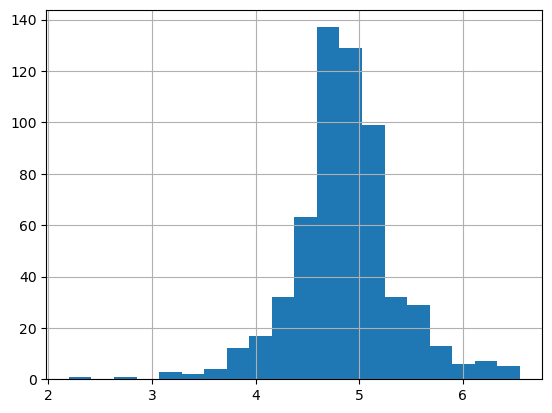

In [13]:
df['loanAmount_log']=np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

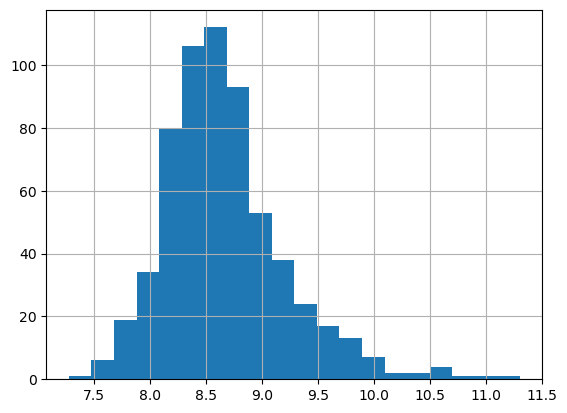

In [16]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [32]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['loanAmount_log'] = df['loanAmount_log'].fillna(df['loanAmount_log'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [34]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

x #iloc function is defined in the pandas module to select a specific row and column in the dataset

array([['Male', 'No', 0, ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [35]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [39]:
print("Percentage of missing Gender is %2f%%" % ((df['Gender'].isnull().sum() / df.shape[0]) * 100))

Percentage of missing Gender is 0.000000%


Number of people who take loan as grouped by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


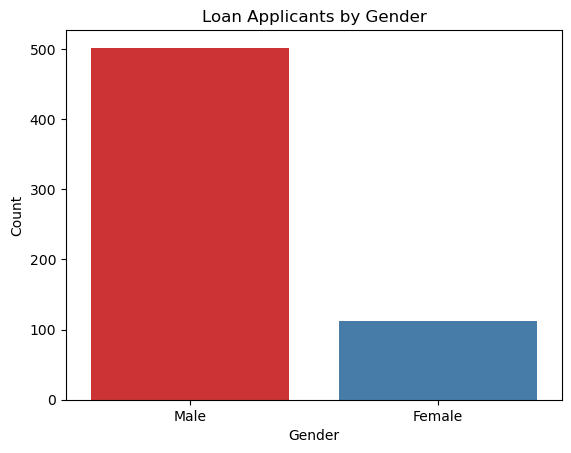

In [42]:
print("Number of people who take loan as grouped by gender:")
print(df['Gender'].value_counts())

sns.countplot(x='Gender', hue='Gender', data=df, palette='Set1', legend=False)
plt.title("Loan Applicants by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#using count the following parameters are accepted by procedures and are listed below.


Number of people who take loan as grouped by marital status:
Married
Yes    401
No     213
Name: count, dtype: int64


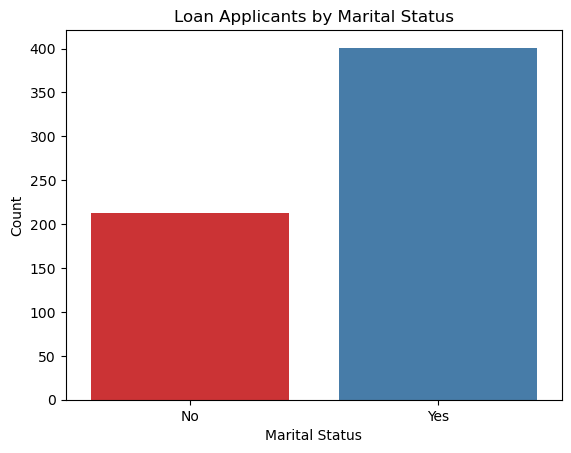

In [43]:
print("Number of people who take loan as grouped by marital status:")
print(df['Married'].value_counts())

sns.countplot(x='Married', hue='Married', data=df, palette='Set1', legend=False)
plt.title("Loan Applicants by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

Number of people who take loan as grouped by dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


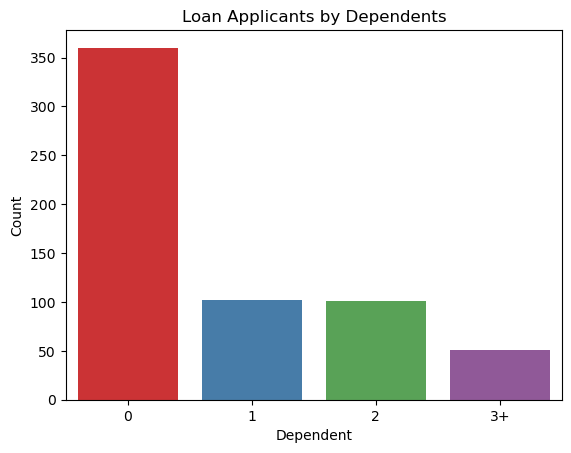

In [44]:
print("Number of people who take loan as grouped by dependents:")
print(df['Dependents'].value_counts())

sns.countplot(x='Dependents', hue='Dependents', data=df, palette='Set1', legend=False)
plt.title("Loan Applicants by Dependents")
plt.xlabel("Dependent")
plt.ylabel("Count")
plt.show()

Number of people who take loan as grouped by Self_Employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


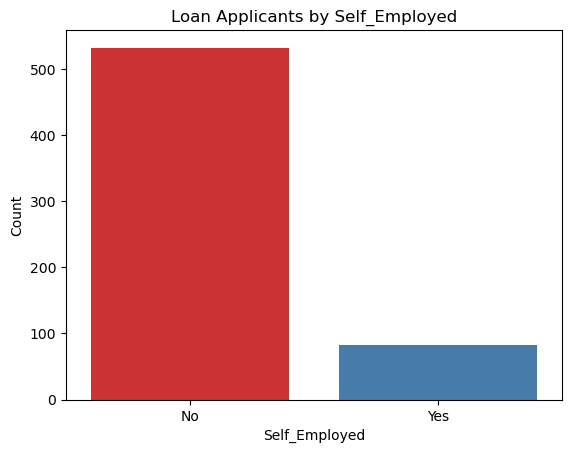

In [45]:
print("Number of people who take loan as grouped by Self_Employed:")
print(df['Self_Employed'].value_counts())

sns.countplot(x='Self_Employed', hue='Self_Employed', data=df, palette='Set1', legend=False)
plt.title("Loan Applicants by Self_Employed")
plt.xlabel("Self_Employed")
plt.ylabel("Count")
plt.show()

Number of people who take loan as grouped by LoanAmount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


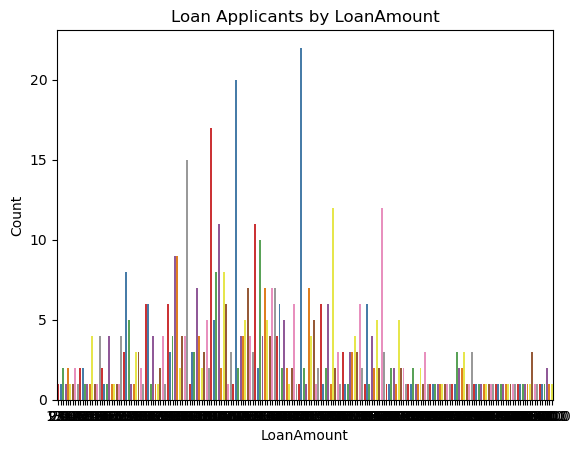

In [46]:
print("Number of people who take loan as grouped by LoanAmount:")
print(df['LoanAmount'].value_counts())

sns.countplot(x='LoanAmount', hue='LoanAmount', data=df, palette='Set1', legend=False)
plt.title("Loan Applicants by Loan Amount")
plt.xlabel("LoanAmount")
plt.ylabel("Count")
plt.show()

Number of people who take loan as grouped by Credit_History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


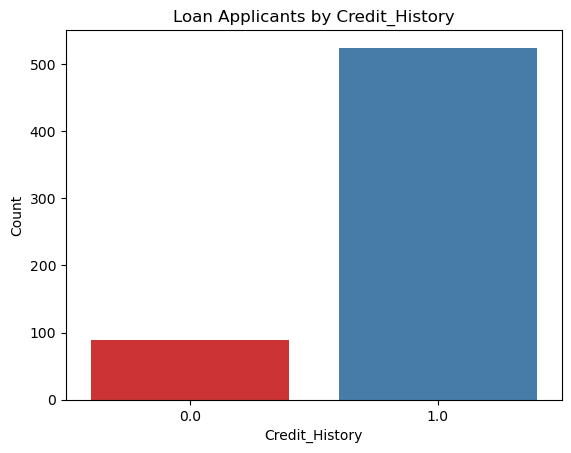

In [47]:
print("Number of people who take loan as grouped by Credit_History:")
print(df['Credit_History'].value_counts())

sns.countplot(x='Credit_History', hue='Credit_History', data=df, palette='Set1', legend=False)
plt.title("Loan Applicants by Credit History")
plt.xlabel("Credit_History")
plt.ylabel("Count")
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x=LabelEncoder()

#scikit learn is one of the most robust library for machine learning. It is open source and is built upon numpy, scipy and matplotlib. It provides a range of tools for machine learning and statistical modelling. The train-test split of sklearn, model selection package in Python splits arrays or metrices into random subsets for train and test data. Label encoder encodes label with a value between 0 and n classes minus 1 where n is the number of distinct label. 

In [76]:
from sklearn.preprocessing import LabelEncoder

for i in range(0, 5):
    Labelencoder_x = LabelEncoder()
    X_train[:, i] = Labelencoder_x.fit_transform(X_train[:, i])

Labelencoder_x = LabelEncoder()
X_train[:, 7] = Labelencoder_x.fit_transform(X_train[:, 7])

X_train


array([[1, 1, ..., 4.875197323201151, 92],
       [1, 0, ..., 5.278114659230517, 374],
       ...,
       [1, 1, ..., 5.075173815233827, 98],
       [0, 1, ..., 5.204006687076795, 138]], dtype=object)

In [69]:
Labelencoder_y = LabelEncoder()
y_train= Labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, ..., 0, 1])

In [77]:
from sklearn.preprocessing import LabelEncoder

for i in range(0, 5):
    Labelencoder_x = LabelEncoder()
    X_test[:, i] = Labelencoder_x.fit_transform(X_test[:, i])

Labelencoder_x = LabelEncoder()
X_test[:, 7] = Labelencoder_x.fit_transform(X_test[:, 7])

X_test


array([[1, 0, ..., 4.430816798843313, 105],
       [0, 0, ..., 4.718498871295094, 42],
       ...,
       [1, 1, ..., 4.248495242049359, 56],
       [1, 1, ..., 4.564348191467836, 24]], dtype=object)

In [78]:
Labelencoder_y = LabelEncoder()
y_test= Labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, ..., 0, 1])

In [81]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
x_test=ss.fit_transform(X_test)


In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
from sklearn import metrics
y_pred=rf_clf.predict(x_test)

print("acc of random forest clf is", metrics.accuracy_score(y_pred, y_test))
y_pred
# 1 means loan approved and 0 means loan not approved

acc of random forest clf is 0.7560975609756098


array([1, 1, ..., 0, 1])

In [85]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [88]:
y_pred = nb_clf.predict(X_test)
print('acc of gaussianNB is %. ', metrics.accuracy_score(y_pred, y_test))



acc of gaussianNB is %.  0.7317073170731707


In [89]:
y_pred #naive bayes is a classification algorithm for binary and multi-class classification problem . It is called Naive Bayes based the caculation of the probabilities for each class are simplified to make that calculation tracable.

array([1, 1, ..., 1, 1])

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [94]:
y_pred = dt_clf.predict(X_test)
print(' acc of Decision Tree is' , metrics.accuracy_score(y_pred, y_test))

 acc of Decision Tree is 0.6585365853658537


In [95]:
y_pred

array([1, 1, ..., 0, 1])

In [96]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
y_pred = kn_clf.predict(X_test)
print(' acc of K- Nearest Neighbor is' , metrics.accuracy_score(y_pred, y_test))

 acc of K- Nearest Neighbor is 0.7235772357723578


In [98]:
y_pred

array([1, 1, ..., 1, 1])